In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
import scipy.stats
import matplotlib
from matplotlib import pyplot as plt
import gc
import mdtraj as md
import pytraj as pt
import numpy as np
import scipy as sp
from scipy.interpolate import CubicSpline
import pandas as pd
import collections
from ipywidgets import FloatProgress
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
from scipy.spatial import Delaunay
import mpl_toolkits
import mpl_toolkits.axes_grid1
from mpl_toolkits.mplot3d import Axes3D
import copy
import sys
import json
import gc
import os.path
import matplotlib
import f90nml

/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .dcd import DCDTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .binpos import BINPOSTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .xtc import XTCTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .trr import TRRTrajectoryFile
/cm/shared/apps/miniconda/lib/python2.7/site-packages/mdtraj/formats/__init__.py:15: RuntimeWarning: numpy.dtype s

In [3]:
!pwd
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

/shared2/work/wenjuan/protein/Piezo


In [4]:
dataDir='./fep_yoda_close/redo-fep/sort_colvars_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
#figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    cor=np.vstack((cor,temp))
    d=d+1

import seaborn as sns
aa=np.array(cor[:,2])
print (np.size(aa))
print (aa)
p,x=np.histogram(aa,bins=1000,density=True)

Replica colvars over trajectories 
20000
[10.5385105053264 10.6030159091911 10.5708472769738 ... 11.541576148727401
 11.425970469551698 11.445642447328598]


Replica colvars over trajectories 
8334
[10.5925609743545 10.1642002649136 10.6414190714006 ... 9.930417532579618
 10.404143860823302 10.073414373998]


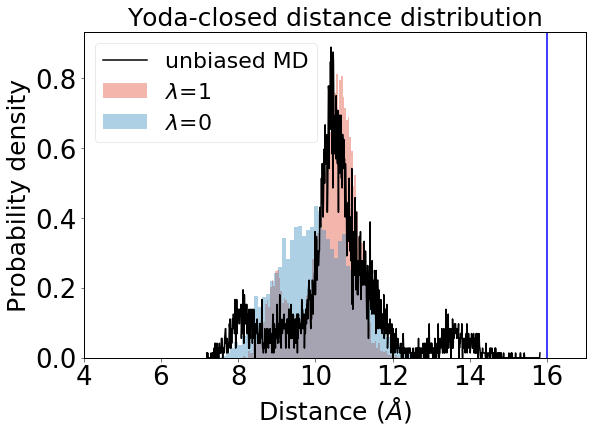

In [9]:
#Data=pd.read_table('./Eve_yoda_dooku_dist/yoda_close_dist.dat',header=None,delim_whitespace=True) # lamda=1
#Data.columns=['Frame','dist']

dataDir='./fep_yoda_close/re_unbiased_MD/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'redu' in datFile]
txtFiles=[datFile for datFile in datFiles if 'colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    cor=np.vstack((cor,temp))
    d=d+1

aa=np.array(cor[:,2])
print (np.size(aa))
print (aa)
p,x=np.histogram(aa,bins=1000,density=True)

negData=pd.read_table('./fep_yoda_close/redo-fep/sort_colvars_traj/fep.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

zData=pd.read_table('./fep_yoda_close/redo-fep/sort_colvars_traj/fep.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']


plt.rcParams['axes.facecolor']='white'
import matplotlib
matplotlib.rc('axes',edgecolor='k')

plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
plt.grid(axis='y', alpha=0.7)
#plt.plot(x[0:1000],p,color='k',label='fep')
plt.plot(x[0:1000],p,color='k',label='unbiased MD')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD')
plt.hist(zData.dist, bins=50,density=True,alpha=0.4,label='$\lambda$=0')
plt.xlabel('Distance ($\AA$)',color='black',fontsize=25)
plt.ylabel('Probability density',color='black',fontsize=25)
plt.yticks(fontsize=18,color='k')
plt.xticks(fontsize=18,color='k')
plt.title('Yoda-closed distance distribution',fontsize=25)
plt.axvline(x=16,color='blue')
plt.xlim(4,17)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

Replica colvars over trajectories 
8334
[0.667401388906543 0.578029988419519 0.899592594262113 ...
 0.9816838941639949 1.36773157882079 1.3405131051136998]


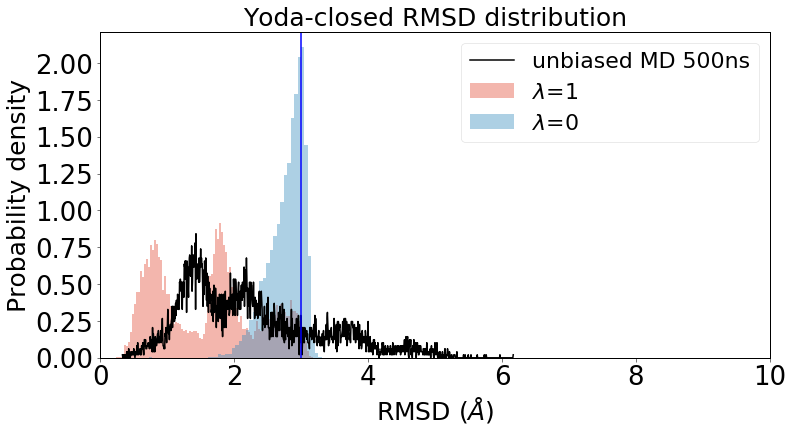

In [8]:
#Data=pd.read_table('./Eve_yoda_dooku_dist/yoda_close_dist.dat',header=None,delim_whitespace=True) # lamda=1
#Data.columns=['Frame','dist']

dataDir='./fep_yoda_close/re_unbiased_MD/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'redu' in datFile]
txtFiles=[datFile for datFile in datFiles if 'colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    cor=np.vstack((cor,temp))
    d=d+1

aa=np.array(cor[:,1])
print (np.size(aa))
print (aa)
p,x=np.histogram(aa,bins=1000,density=True)

negData=pd.read_table('./fep_yoda_close/redo-fep/sort_colvars_traj/fep.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

zData=pd.read_table('./fep_yoda_close/redo-fep/sort_colvars_traj/fep.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']


plt.rcParams['axes.facecolor']='white'
import matplotlib
matplotlib.rc('axes',edgecolor='k')

plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(negData['rmsd'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
plt.grid(axis='y', alpha=0.7)
#plt.plot(x[0:1000],p,color='k',label='fep')
plt.plot(x[0:1000],p,color='k',label='unbiased MD 500ns')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD')
plt.hist(zData.rmsd, bins=50,density=True,alpha=0.4,label='$\lambda$=0')
plt.xlabel('RMSD ($\AA$)',color='black',fontsize=25)
plt.ylabel('Probability density',color='black',fontsize=25)
plt.yticks(fontsize=18,color='k')
plt.xticks(fontsize=18,color='k')
plt.title('Yoda-closed RMSD distribution',fontsize=25)
plt.axvline(x=3,color='blue')
plt.xlim(0,10)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

Replica colvars over trajectories 
loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep1.colvars.traj


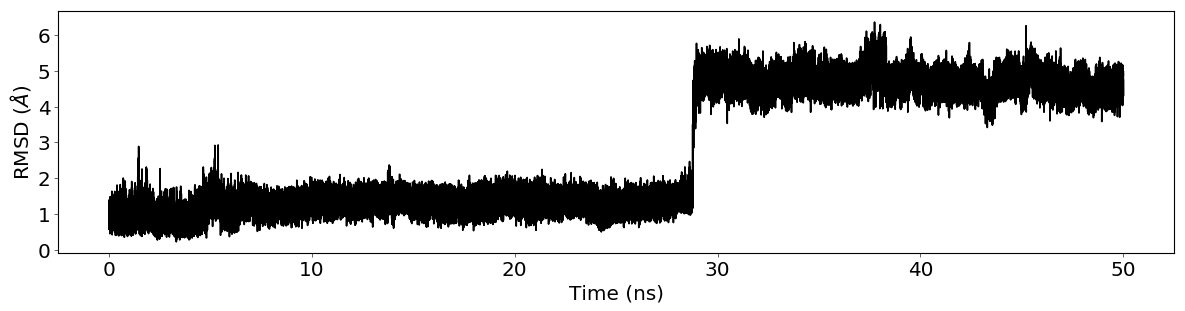

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep10.colvars.traj


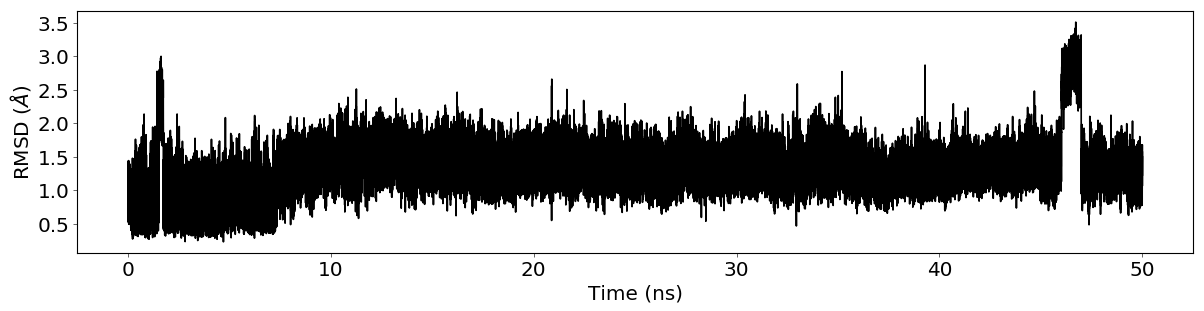

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep2.colvars.traj


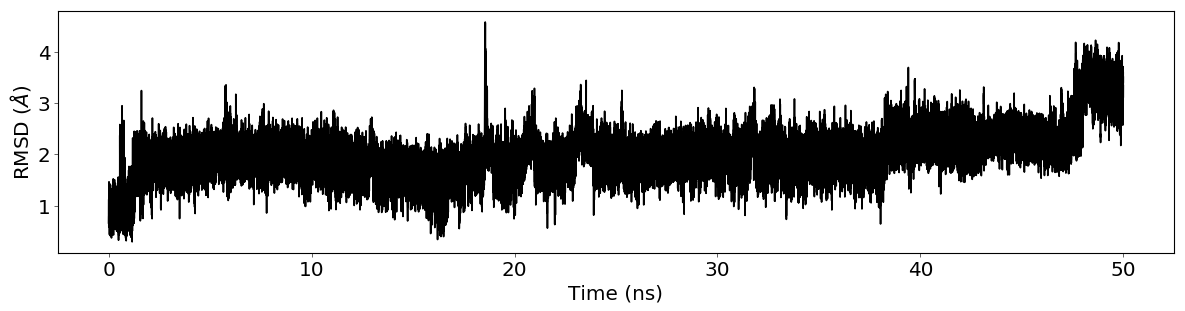

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep3.colvars.traj


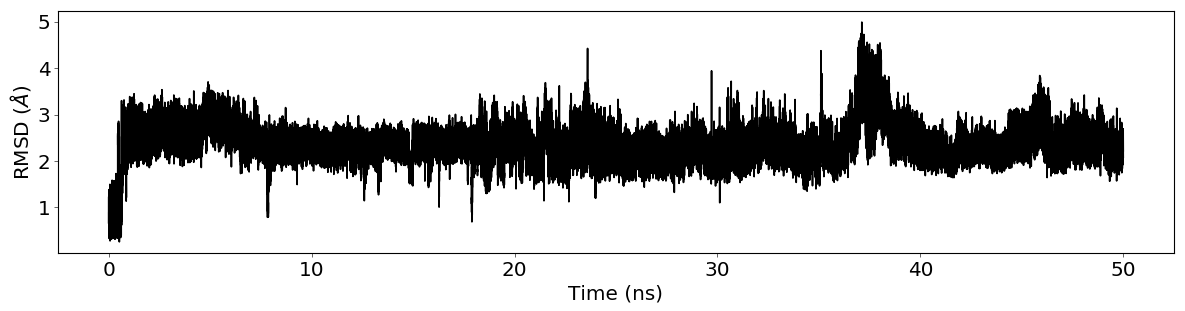

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep4.colvars.traj


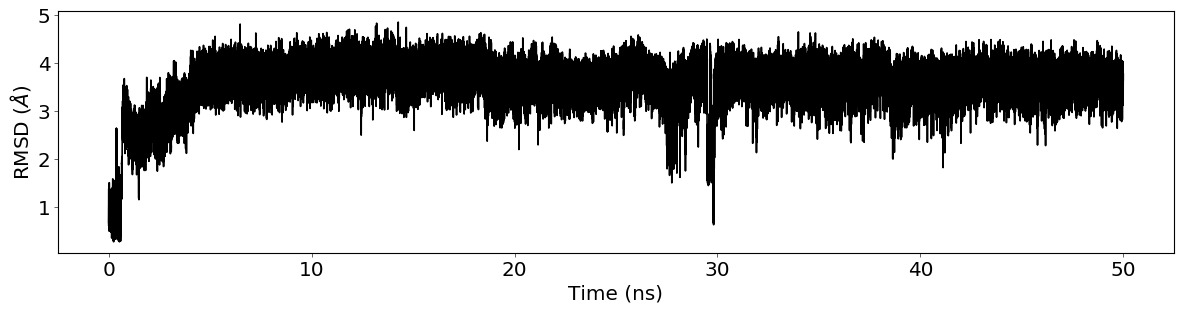

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep5.colvars.traj


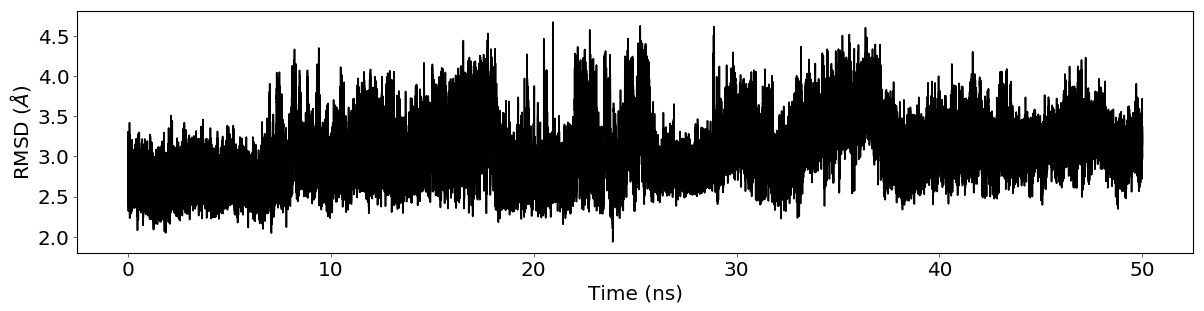

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep6.colvars.traj


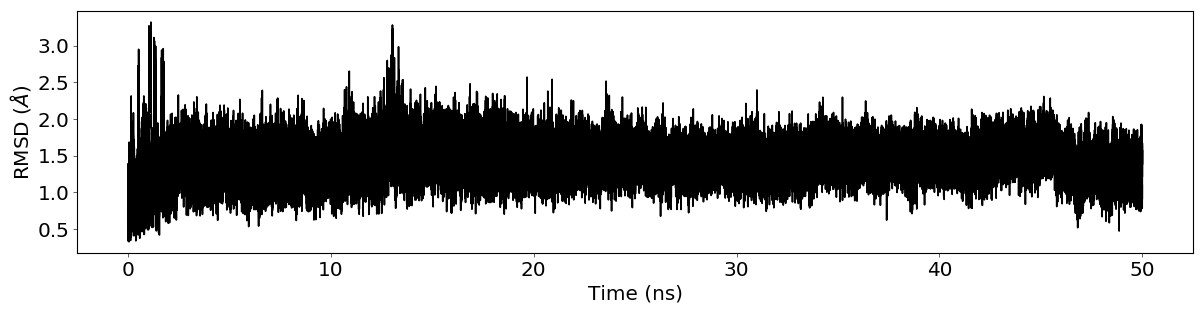

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep7.colvars.traj


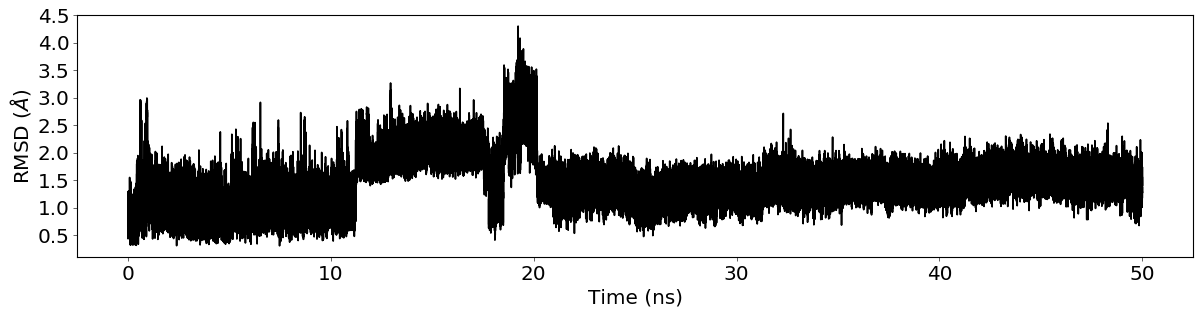

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep8.colvars.traj


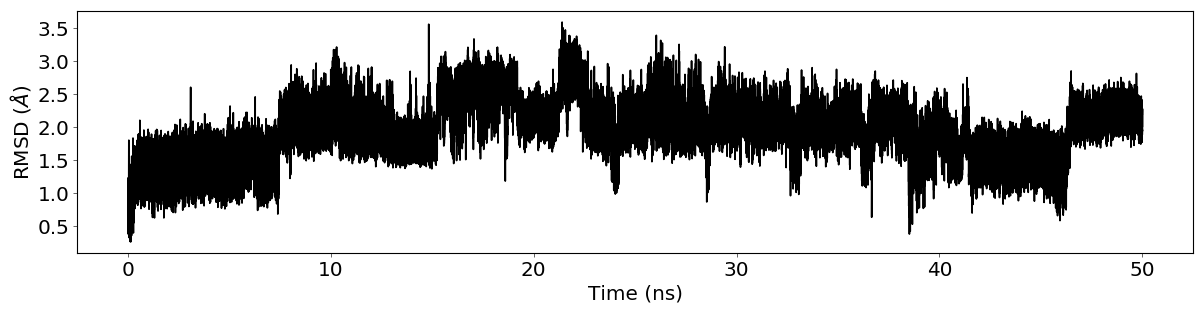

loading fluctuation data from ./fep_yoda_close/re_unbiased_MD/rep9.colvars.traj


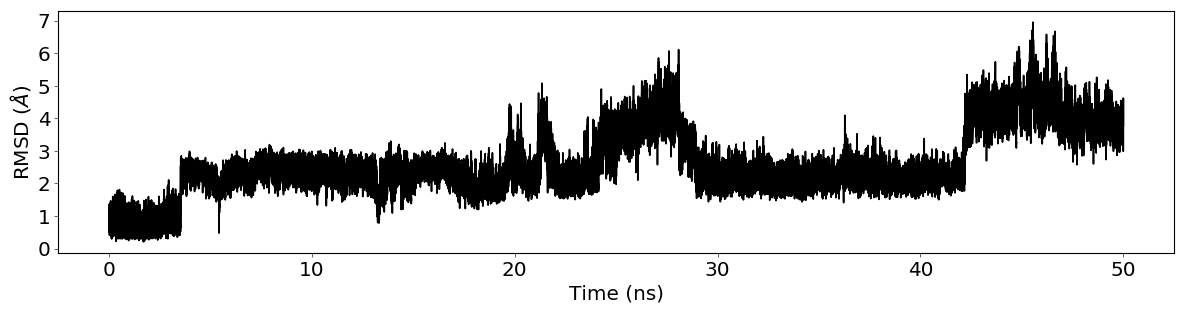

In [9]:
#negData=pd.read_table('./fep_yoda_close/re_unbiased_MD/rep6.colvars.traj',header=None,delim_whitespace=True) # lamda=1
#negData.columns=['Frame','rmsd','dist']
#plt.rcParams['axes.facecolor']='white'
#import matplotlib
#matplotlib.rc('axes',edgecolor='k')
#plt.figure(figsize=(12,4))
#plt.plot(negData.Frame*0.001*0.001,negData.rmsd,color='k',label='unbiased MD 300ns')
##n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.7,density=True)
#plt.grid(axis='y', alpha=0.75)
#plt.yticks(fontsize=18,color='k')
#plt.xticks(fontsize=18,color='k')
#plt.xlabel('Time (ns)',color='k',fontsize=18)
#plt.ylabel('RMSD ($\AA$)',color='k',fontsize=18)
#plt.show()




dataDir='./fep_yoda_close/re_unbiased_MD/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'rep' in datFile]
txtFiles=[datFile for datFile in datFiles if 'colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1

#cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    print ('loading fluctuation data from %s'%filepath)
    figure(num=None, figsize=(18, 4), dpi=80, facecolor='w', edgecolor='k')
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    negData.columns=['Frame','rmsd','dist']
    plt.plot(negData.Frame*0.001*0.001,negData.rmsd,color='k',label='unbiased MD 300ns')
    #n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.7,density=True)
    plt.grid(axis='y', alpha=0.75)
    plt.yticks(fontsize=18,color='k')
    plt.xticks(fontsize=18,color='k') 
    plt.xlabel('Time (ns)',color='k',fontsize=18)
    plt.ylabel('RMSD ($\AA$)',color='k',fontsize=18)
    plt.show()
    #negData.columns=['Frame','rmsd','dist']
    #temp=negData
    #cor=np.vstack((cor,temp))
    #d=d+1

In [11]:
#negData=pd.read_table('./fep_yoda_close/redo-fep/fep.job2.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
#negData.columns=['Frame','rmsd','dist']

#plt.rcParams['axes.facecolor']='white'
#import matplotlib
#matplotlib.rc('axes',edgecolor='k')
#plt.figure(figsize=(12,6))
#n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.7,density=True)
#plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Distance ($\AA$)',fontsize=25)
#plt.ylabel('Probability density',fontsize=25)
#plt.show()


In [16]:
dataDir='./fep_yoda_open/test_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job4' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
#figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
corY_O=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    corY_O=np.vstack((corY_O,temp))
    d=d+1

Replica colvars over trajectories 


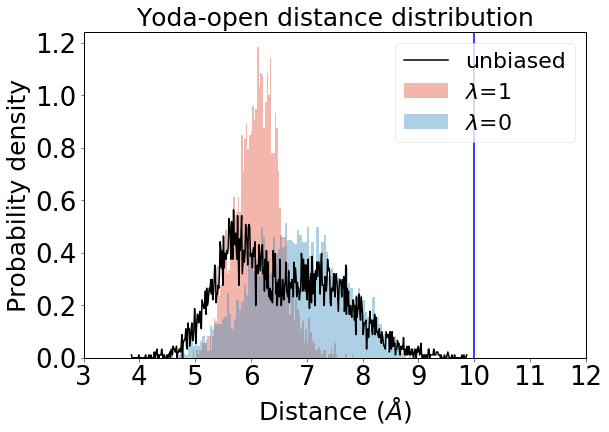

In [24]:

Data=pd.read_table('./Eve_yoda_dooku_dist/yoda_open_dist.dat',header=None,delim_whitespace=True) # lamda=1
Data.columns=['Frame','dist']
p,x=np.histogram(Data.dist,bins=500,density=True)

negData=pd.read_table('./fep_yoda_open/test_traj/fep.job4.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

negData0=pd.read_table('./fep_yoda_open/test_traj/fep.job4.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData0.columns=['Frame','rmsd','dist']


plt.figure(figsize=(9,6))

n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
n, bins, patches = plt.hist(negData0['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=0')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:500],p,color='k',label='unbiased')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD')
plt.xlabel('Distance ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Yoda-open distance distribution',fontsize=25)
plt.yticks(fontsize=18,color='k')
plt.xticks(fontsize=18,color='k')
plt.axvline(x=10,color='blue')
plt.xlim(3,12)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

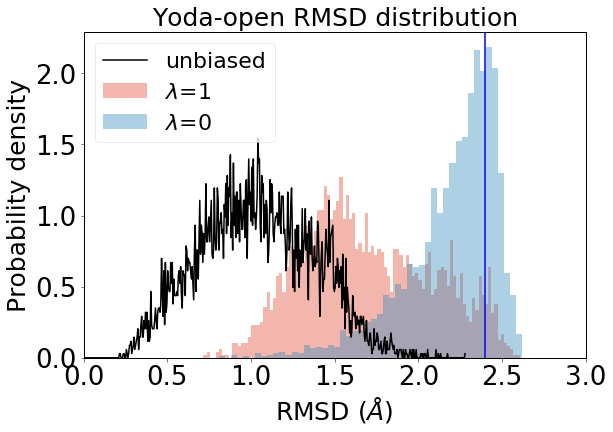

In [25]:
#import seaborn as sns
#aa=np.array(corY_O[:,1])
#print (np.size(aa))
#print (aa)
#p,x=np.histogram(aa,bins=1000,density=True)

Data=pd.read_table('./Eve_yoda_dooku_dist/yoda_open_rms.dat',header=None,delim_whitespace=True) # lamda=1
Data.columns=['Frame','dist']
p,x=np.histogram(Data.dist,bins=500,density=True)

negData=pd.read_table('./fep_yoda_open/test_traj/fep.job4.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

zData=pd.read_table('./fep_yoda_open/test_traj/fep.job4.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']


plt.figure(figsize=(9,6))

n, bins, patches = plt.hist(negData['rmsd'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:500],p,color='k',label='unbiased')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD 500ns')
plt.hist(zData.rmsd, bins=50,density=True,alpha=0.4,label='$\lambda$=0')
plt.xlabel('RMSD ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Yoda-open RMSD distribution',fontsize=25)
plt.yticks(fontsize=18,color='k')
plt.xticks(fontsize=18,color='k')
plt.axvline(x=2.4,color='blue')
plt.xlim(0,3)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

In [19]:
dataDir='./fep_dooku_open/test_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job6' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]


import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
#figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
corD_O=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    corD_O=np.vstack((corD_O,temp))
    d=d+1

Replica colvars over trajectories 


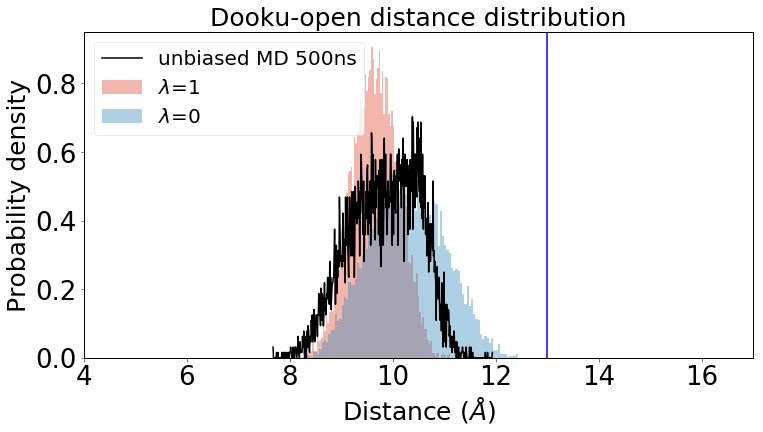

In [20]:
#import seaborn as sns
#aa=np.array(corD_O[:,2])
#print (np.size(aa))
#print (aa)
#p,x=np.histogram(aa,bins=1000,density=True)

Data=pd.read_table('./Eve_yoda_dooku_dist/dooku_open_dist.dat',header=None,delim_whitespace=True) # lamda=1
Data.columns=['Frame','dist']
p,x=np.histogram(Data.dist,bins=500,density=True)

negData=pd.read_table('./fep_dooku_open/test_traj/fep.job689.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

zData=pd.read_table('./fep_dooku_open/test_traj/fep.job689.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']

plt.rcParams['axes.facecolor']='white'
import matplotlib
matplotlib.rc('axes',edgecolor='k')
plt.figure(figsize=(12,6))

n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
n, bins, patches = plt.hist(zData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=0')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:500],p,color='k',label='unbiased MD 500ns')
#plt.hist(Data.dist, bins=100,density=True,alpha=0.4,label='unbiased MD')
plt.xlabel('Distance ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Dooku-open distance distribution',color='k',fontsize=25)
plt.axvline(x=13,color='blue')
plt.xlim(4,17)
plt.yticks(fontsize=18,color='k')
plt.xticks(fontsize=18,color='k')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(loc='upper left',fontsize=20)
plt.show()

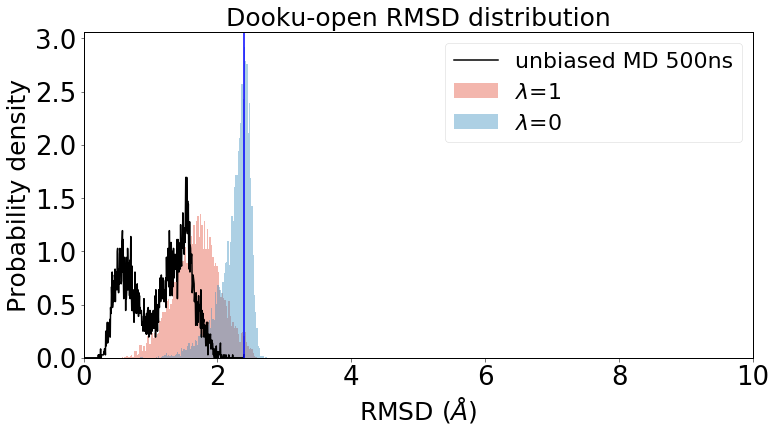

In [21]:

Data=pd.read_table('./Eve_yoda_dooku_dist/dooku_open_rms.dat',header=None,delim_whitespace=True) # lamda=1
Data.columns=['Frame','dist']
p,x=np.histogram(Data.dist,bins=500,density=True)


negData=pd.read_table('./fep_dooku_open/test_traj/fep.job689.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']

zData=pd.read_table('./fep_dooku_open/test_traj/fep.job689.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']

plt.figure(figsize=(12,6))

n, bins, patches = plt.hist(negData['rmsd'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:500],p,color='k',label='unbiased MD 500ns')
#plt.hist(Data.dist, bins=100,density=True,alpha=0.4,label='unbiased MD')
plt.hist(zData.rmsd, bins=100,density=True,alpha=0.4,label='$\lambda$=0')
plt.xlabel('RMSD ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Dooku-open RMSD distribution',color='k',fontsize=25)
plt.axvline(x=2.4,color='blue')
plt.xlim(0,10)
plt.yticks(fontsize=26,color='k')
plt.xticks(fontsize=26,color='k')
plt.legend(loc='best',fontsize=22)
plt.show()

In [22]:
dataDir='./fep_dooku_close/redo/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job3' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
#figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
corD_C=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    corD_C=np.vstack((corD_C,temp))
    d=d+1

Replica colvars over trajectories 


Replica colvars over trajectories 
4167
[11.2096324211445 11.1045967293453 11.575496397009802 ... 10.1693563352547
 10.5459626991957 10.6372648082158]


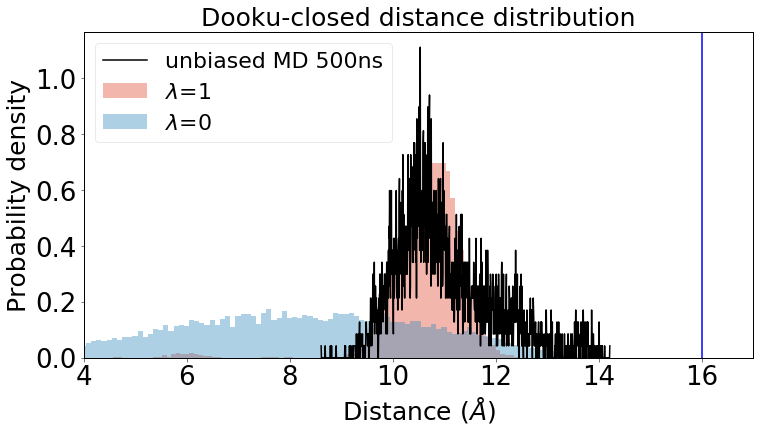

In [24]:
dataDir='./fep_dooku_close/re_unbiased_MD/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'redu' in datFile]
txtFiles=[datFile for datFile in datFiles if 'colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    cor=np.vstack((cor,temp))
    d=d+1

aa=np.array(cor[:,2])
print (np.size(aa))
print (aa)
p,x=np.histogram(aa,bins=1000,density=True)

#Data=pd.read_table('./Eve_yoda_dooku_dist/dooku_close_dist.dat',header=None,delim_whitespace=True) # lamda=1
#Data.columns=['Frame','dist']
#p,x=np.histogram(Data.dist,bins=1000,density=True)


negData=pd.read_table('./fep_dooku_close/redo/job345.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']
zData=pd.read_table('./fep_dooku_close/redo/job345.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']


import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
plt.rcParams['axes.facecolor']='white'
plt.figure(figsize=(12,6))

n, bins, patches = plt.hist(negData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
#n, bins, patches = plt.hist(dData['d'], bins=100, alpha=0.4,density=True,label='$\lambda$=dist-dcd')
n, bins, patches = plt.hist(zData['dist'], bins=100, alpha=0.4,density=True,label='$\lambda$=0')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:1000],p,color='k',label='unbiased MD 500ns')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD')
plt.xlabel('Distance ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Dooku-closed distance distribution',color='k',fontsize=25)
plt.axvline(x=16,color='blue')
plt.xlim(4,17)
plt.xticks(color='k',fontsize=26)
plt.yticks(color='k',fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

Replica colvars over trajectories 
4167
[5.6426735436421795 5.54051158328246 5.839643661745019 ...
 4.20003055807066 4.58881083023395 4.703847201932231]


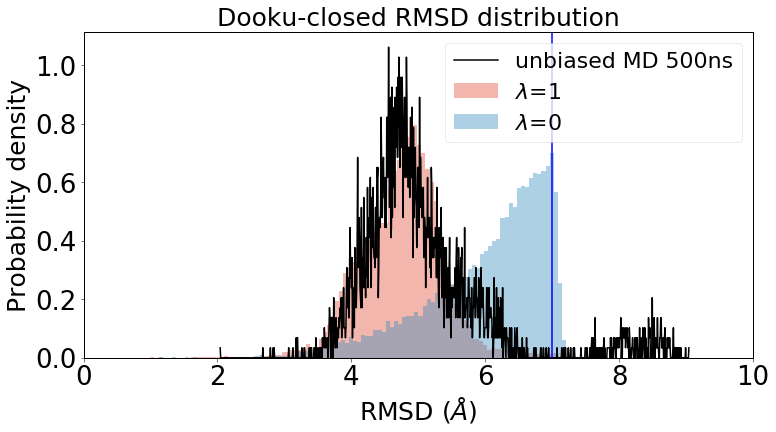

In [25]:
dataDir='./fep_dooku_close/re_unbiased_MD/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'redu' in datFile]
txtFiles=[datFile for datFile in datFiles if 'colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
cor=np.empty(shape=(0,3),dtype='object')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    #negData.columns=['Frame','rmsd','dist']
    temp=negData
    cor=np.vstack((cor,temp))
    d=d+1


#Data=pd.read_table('./Eve_yoda_dooku_dist/dooku_close_rms.dat',header=None,delim_whitespace=True) # lamda=1
#Data.columns=['Frame','dist']
#p,x=np.histogram(Data.dist,bins=500,density=True)
aa=np.array(cor[:,1])
print (np.size(aa))
print (aa)
p,x=np.histogram(aa,bins=1000,density=True)



negData=pd.read_table('./fep_dooku_close/redo/job345.127.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
negData.columns=['Frame','rmsd','dist']
zData=pd.read_table('./fep_dooku_close/redo/job345.0.sort.colvars.traj',header=None,delim_whitespace=True) # lamda=1
zData.columns=['Frame','rmsd','dist']


plt.figure(figsize=(12,6))

n, bins, patches = plt.hist(negData['rmsd'], bins=100, alpha=0.4,density=True,label='$\lambda$=1')
n, bins, patches = plt.hist(zData['rmsd'], bins=100, alpha=0.4,density=True,label='$\lambda$=0')
plt.grid(axis='y', alpha=0.7)
plt.plot(x[0:1000],p,color='k',label='unbiased MD 500ns')
#plt.hist(Data.dist, bins=50,density=True,alpha=0.4,label='unbiased MD')
plt.xlabel('RMSD ($\AA$)',color='k',fontsize=25)
plt.ylabel('Probability density',color='k',fontsize=25)
plt.title('Dooku-closed RMSD distribution',color='k',fontsize=25)
plt.axvline(x=7,color='blue')
plt.xlim(0,10)
plt.xticks(color='k',fontsize=26)
plt.yticks(color='k',fontsize=26)
plt.legend(loc='best',fontsize=22)
plt.show()

Replica colvars over trajectories 


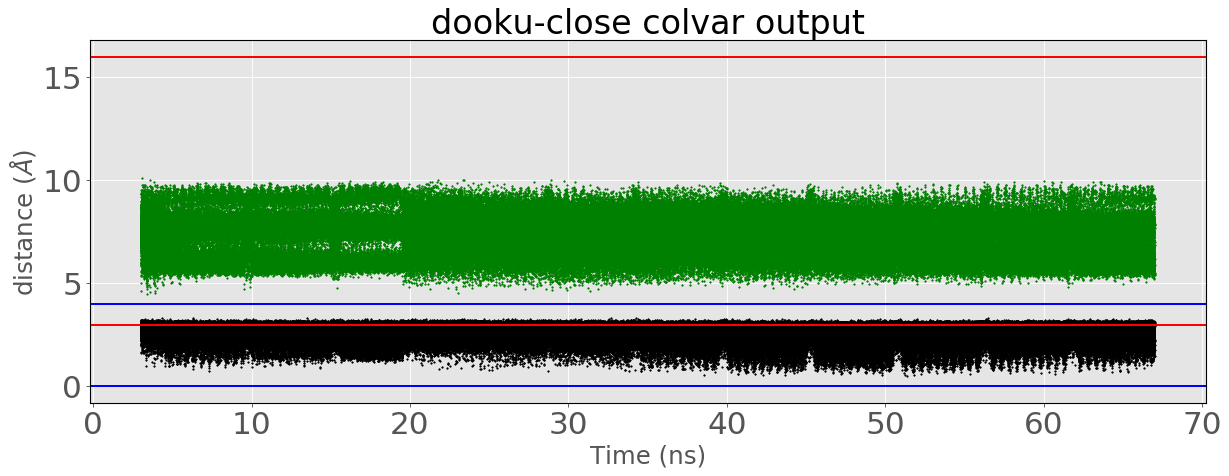

In [62]:
dataDir='./fep_dooku_close/test_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job3' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    delta=(d-1)*0.5
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    negData.columns=['Frame','rmsd','dist']
    plt.title("dooku-close job0 state",fontsize=30)
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['rmsd'],s=2,color='black')
    #plt.scatter(delta+negData['Frame']*0.001*0.001,negData['lipZ'],s=2,color='red')
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['dist'],s=2,color='green')
    plt.xlabel(r"Time (ns)",fontsize=22)
    plt.ylabel(r"distance ($\AA$)",fontsize=22)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)
    plt.axhline(y=4,color='b',linestyle='-')
    plt.axhline(y=16,color='r',linestyle='-')
    plt.axhline(y=3,color='r',linestyle='-')
    plt.axhline(y=0,color='b',linestyle='-')
    #plt.legend(fontsize=20)
    d=d+1
    #plt.yticks(np.arange(0,200,45))
    #plt.ylim(-5.5,1.5)
    #plt.xlim(0,2)
plt.title('dooku-close colvar output',fontsize=30)
plt.show()

Replica colvars over trajectories 


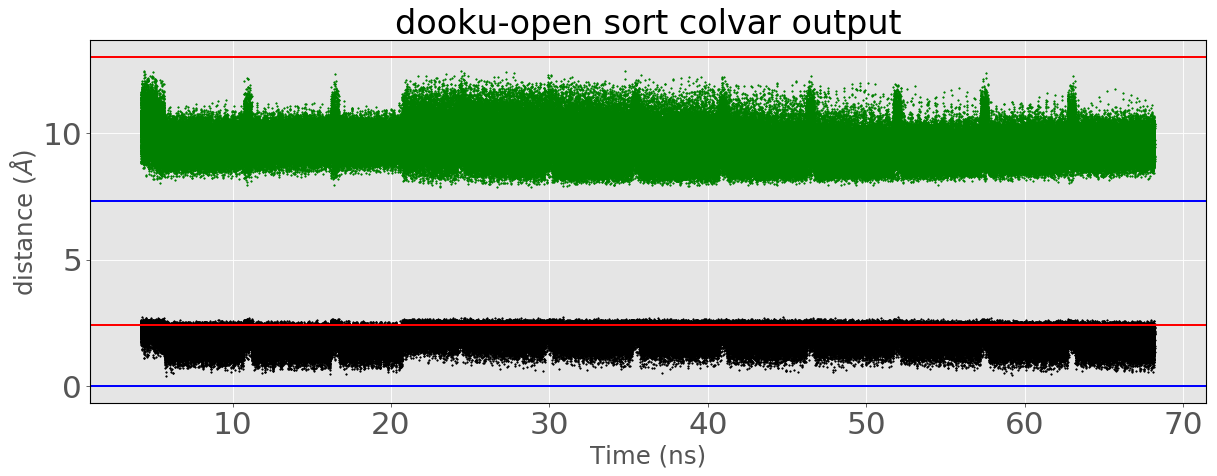

In [53]:
dataDir='./fep_dooku_open/test_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job6' in datFile]
txtFiles=[datFile for datFile in datFiles if 'sort.colvars.traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    #print ('loading fluctuation data from %s'%filepath)
    delta=(d-1)*0.5
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    negData.columns=['Frame','rmsd','dist']
    plt.title("dooku-close job0 state",fontsize=30)
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['rmsd'],s=2,color='black')
    #plt.scatter(delta+negData['Frame']*0.001*0.001,negData['lipZ'],s=2,color='red')
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['dist'],s=2,color='green')
    plt.xlabel(r"Time (ns)",fontsize=22)
    plt.ylabel(r"distance ($\AA$)",fontsize=22)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)
    plt.axhline(y=7.3,color='b',linestyle='-')
    plt.axhline(y=13,color='r',linestyle='-')
    plt.axhline(y=2.4,color='r',linestyle='-')
    plt.axhline(y=0,color='b',linestyle='-')
    #plt.legend(fontsize=20)
    d=d+1
    #plt.yticks(np.arange(0,200,45))
    #plt.ylim(-5.5,1.5)
    #plt.xlim(0,2)
plt.title('dooku-open sort colvar output',fontsize=30)
plt.show()

Replica colvars over trajectories 
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.0.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.1.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.10.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.100.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.101.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.102.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.103.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.104.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.105.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.106.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/fep.job0.107.colvars.traj
loading fluctuation data from ./fep_yoda_close/test_traj/

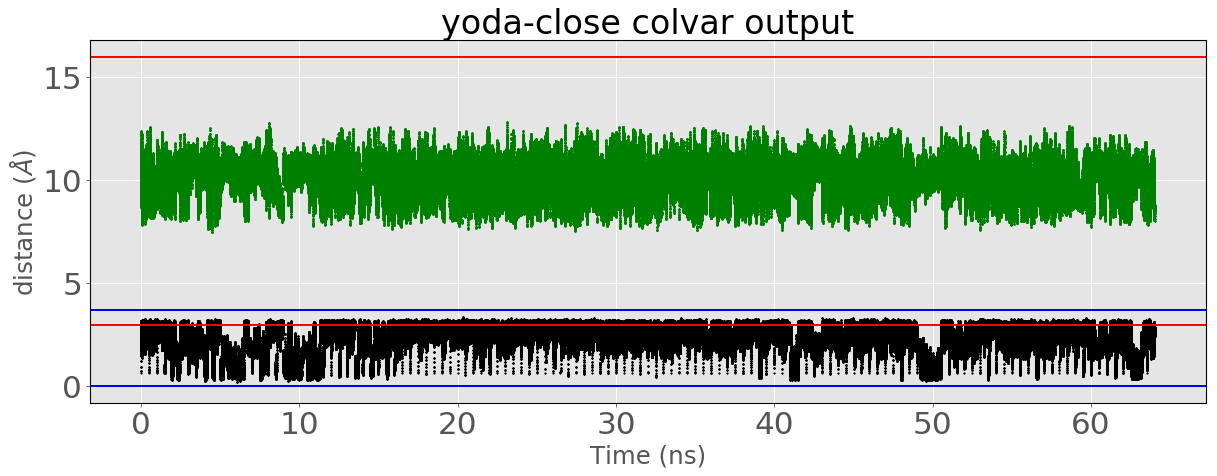

In [5]:
dataDir='./fep_yoda_close/test_traj/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job0' in datFile]
txtFiles=[datFile for datFile in datFiles if 'traj' in datFile]
#print txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "

d=1
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    print ('loading fluctuation data from %s'%filepath)
    delta=(d-1)*0.5
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    negData.columns=['Frame','rmsd','dist']
    plt.title("dooku-close job0 state",fontsize=30)
    plt.scatter(delta+negData['Frame']*0.001*0.001,negData['rmsd'],s=2,color='black')
    #plt.scatter(delta+negData['Frame']*0.001*0.001,negData['lipZ'],s=2,color='red')
    plt.scatter(delta+negData['Frame']*0.001*0.001,negData['dist'],s=2,color='green')
    plt.xlabel(r"Time (ns)",fontsize=22)
    plt.ylabel(r"distance ($\AA$)",fontsize=22)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)
    plt.axhline(y=3.7,color='b',linestyle='-')
    plt.axhline(y=16,color='r',linestyle='-')
    plt.axhline(y=3,color='r',linestyle='-')
    plt.axhline(y=0,color='b',linestyle='-')
    #plt.legend(fontsize=20)
    d=d+1
    #plt.yticks(np.arange(0,200,45))
    #plt.ylim(-5.5,1.5)
    #plt.xlim(0,2)
plt.title('yoda-close colvar output',fontsize=30)
plt.show()

Replica colvars over trajectories 
loading fluctuation data from ./check_folder/3lipids/fep.job3.0.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.1.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.10.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.100.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.101.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.102.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.103.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.104.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.105.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.106.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.107.colvars.traj
loading fluctuation data from ./check_folder/3lipids/fep.job3.108.colvars.traj
loading fluctuation da

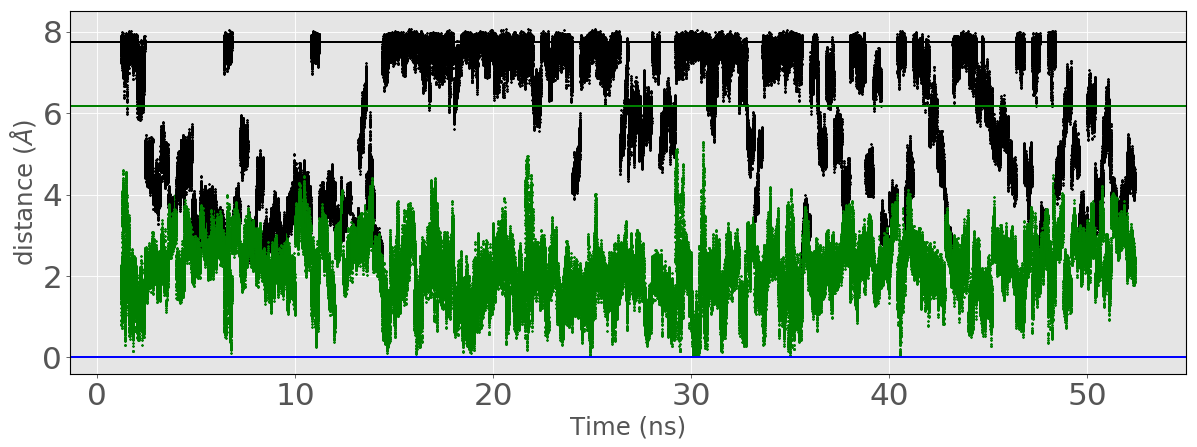

In [17]:
dataDir='./check_folder/3lipids/' #set this to the appropriate directory name
dataFiles=np.sort(os.listdir(dataDir))

datFiles=[datFile for datFile in dataFiles if 'fep.job3' in datFile]
txtFiles=[datFile for datFile in datFiles if 'traj' in datFile]

#int txtFiles
parmData=['%s'%restFile for restFile in txtFiles ]

import matplotlib
matplotlib.rc('axes',edgecolor='k')
from matplotlib.pyplot import figure
print "Replica colvars over trajectories "
d=1
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
for restFile in parmData:
    filepath=''.join([dataDir,'%s'%restFile])
    print ('loading fluctuation data from %s'%filepath)
    delta=(d-1)*0.4
    negData=pd.read_table(filepath,header=None,delim_whitespace=True)
    negData.columns=['Frame','rmsd','dist','l299','d299','l310','d310',
                     'l191','d191','l123','d123','l64','d64','l61','d61',
                    'l81','d81','l53','d53','l137','d137']
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['rmsd'],s=2,color='black')
    #plt.scatter(delta+negData['Frame']*0.001*0.001,negData['lipZ'],s=2,color='red')
    plt.scatter(delta+negData['Frame']*0.002*0.001,negData['dist'],s=2,color='green')
    plt.xlabel(r"Time (ns)",fontsize=22)
    plt.ylabel(r"distance ($\AA$)",fontsize=22)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)
    plt.axhline(y=0,color='b',linestyle='-')
    plt.axhline(y=6.169,color='g',linestyle='-')
    plt.axhline(y=7.745,color='k',linestyle='-')
    plt.axhline(y=0,color='b',linestyle='-')
    #plt.legend(fontsize=20)
    d=d+1
    #plt.yticks(np.arange(0,200,45))
    #plt.ylim(-5.5,1.5)
    #plt.xlim(0,2)
plt.show()